# HW 1 - Statistical learning and Optimization

Complete the following questions and resubmit this entire notebook to canvas.
- For questions that ask you to derive or find a quantity use a __text cell__ to show your calculations.
 - Use markdown to write math expressions (as was done to create these problems) and make sure to show your work.
 - It doesnt have to be perfect looking but it needs to be readible and clear. No extraneous work please.
- For questions that ask you compute something or write code use a __code cell__ to write your code.
 - You can create additional code cells as needed.
 - Just make sure your code is commented, the functions are named appropriately, and its easy to see your final answer.
- The total points on this homework is 100. Out of these 5 points are reserved for clarity of presentation,
punctuation and commenting with respect to the code.

__SUBMISSION__

When you submit you will submit a pdf file __and__ the notebook file. The TA will use the pdf file to grade more quickly. The notebook file is there to confirm your work.

To generate a pdf file
1. Click File
2. Click print
3. Set the destinationas "save as pdf"
4. Hit print

Title the pdf file `LASTNAME-FIRSTNAME-HW1.pdf`
Title your notebook file as `LASTNAME-FIRSTNAME-HW1.ipynb`

Submit both files.

Do not actually print your notebook out (what year is this?)



In [227]:
# libraries and functions you may find useful
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from tqdm.notebook import trange

# Q1 - Linear Algebra and Probability Review (20 points)

    

## part 1 - Basic Operations (6 points)

 Compute the following operations using functions from **pytorch**

  1. $$\begin{pmatrix} 1 & 2 \\ 4 & 5  \end{pmatrix} + \begin{pmatrix} -1 & 2 \\ -3 & 4 \end{pmatrix}$$

  2. $$\begin{pmatrix} 1 & 2 & 3\\ 4 & 5 & 6 \end{pmatrix} \begin{pmatrix} -1 & 2 \\ -3 & 4\\-5 & 6 \end{pmatrix}$$

  3. $$\begin{pmatrix} 1 & 1 & -1\\ -1 & 1 & -1 \\ 1 & -1 & 1\end{pmatrix} \begin{pmatrix} 4 \\ -3 \\ -2 \end{pmatrix}$$

  4. $$\begin{pmatrix} 1 & 4 & 3 \\ 4 & 2 & -6  \\ -1 & -2 & 1 \end{pmatrix}^T$$

  5. $$\begin{pmatrix} 1 & 4 & 3 \\ 4 & 2 & -6  \\ -1 & -2 & 1 \end{pmatrix}^{-1}$$
  
  6. $$\text{det} \begin{pmatrix} 1 & 4 & 3 \\ 4 & 2 & -6  \\ -1 & -2 & 1 \end{pmatrix}$$

In [228]:
# q1

# Create tensor_a from matrix_a above
tensor_a = torch.tensor([[1, 2],
                         [4, 5]])

# Create tensor_b from matrix_b above
tensor_b = torch.tensor([[-1, 2],
                         [-3, 4]])

# Add the two matrices together element by element
result = tensor_a + tensor_b

# Print Result
print("Result (A + B):\n", result)


Result (A + B):
 tensor([[0, 4],
        [1, 9]])


In [229]:
# q2

# Create tensor_c from the first matrix
tensor_c = torch.tensor([[1, 2, 3],
                         [4, 5, 6]])

# Create tensor_d from the second matrix
tensor_d = torch.tensor([[-1, 2],
                         [-3, 4],
                         [-5, 6]])

# Perform matrix multiplication between tensor_c and tensor_d
result = torch.matmul(tensor_c, tensor_d)

# Print the result of the matrix multiplication
print("Result (C * D):\n", result)


Result (C * D):
 tensor([[-22,  28],
        [-49,  64]])


In [230]:
#q3

# Create tensor_e from the first matrix
tensor_e = torch.tensor([[1, 1, -1],
                         [-1, 1, -1],
                         [1, -1, 1]])

# Create tensor_f from the second matrix (1x3)
tensor_f = torch.tensor([[4, -3, -2]])

# Perform matrix multiplication between tensor_e and the transpose of tensor_f
result = torch.matmul(tensor_e, tensor_f.T)

# Print the result of the matrix multiplication
print("Result (E * F):\n", result)


Result (E * F):
 tensor([[ 3],
        [-5],
        [ 5]])


In [231]:
#q4
# Create tensor_g from the given matrix
tensor_g = torch.tensor([[1, 4, 3],
                         [4, 2, -6],
                         [-1, -2, 1]])

# Compute the transpose of tensor_g
result = tensor_g.T

# Print the transpose of Matrix G
print("Result (G Transpose):\n", result)


Result (G Transpose):
 tensor([[ 1,  4, -1],
        [ 4,  2, -2],
        [ 3, -6,  1]])


In [232]:
#q5

# Create tensor_g as a 3x3 matrix of type float32
tensor_g = torch.tensor([[1, 4, 3],
                         [4, 2, -6],
                         [-1, -2, 1]], dtype=torch.float32)

# Compute the inverse of tensor_g
tensor_g_inv = torch.inverse(tensor_g)

# Print the inverse of Matrix G
print("Result (G Inverse):\n", tensor_g_inv)


Result (G Inverse):
 tensor([[ 0.5000,  0.5000,  1.5000],
        [-0.1000, -0.2000, -0.9000],
        [ 0.3000,  0.1000,  0.7000]])


In [233]:
#q6

# Create tensor_g as a 3x3 matrix of type float32
tensor_g = torch.tensor([[1, 4, 3],
                         [4, 2, -6],
                         [-1, -2, 1]], dtype=torch.float32)

# Compute the determinant of tensor_g
tensor_g_det = torch.det(tensor_g)

# Print the determinant of Matrix G
print("Result (G Determinant):\n", tensor_g_det)


Result (G Determinant):
 tensor(-20.0000)


## part 2 - Eigenvalues (2 points)

Use **pytorch** to find the largest 5 eigenvalues of $\frac{1}{500}X^T X$, where $X$ is provided below (do not change $X$)

_note: for this problem, you will need to convert the numpy object to a torch object_

In [234]:
np.random.seed(0)
x = np.random.normal(0, 1, [500, 25])

In [235]:
# Convert the numpy array to a PyTorch tensor
tensor_x = torch.from_numpy(x)

# Compute X^T
tensor_x_t = tensor_x.T

# Compute X^T X, multiply by 500
tensor_x_t_x = torch.matmul(tensor_x_t, tensor_x) * 500

# Compute eigenvalues
eigenvalues = torch.linalg.eigvals(tensor_x_t_x)

# Extract the largest 5 eigenvalues
largest_eigenvalues = torch.topk(eigenvalues.real, 5)

# Print the largest 5 eigenvalues
print("Largest 5 Eigenvalues:")
print(largest_eigenvalues)


Largest 5 Eigenvalues:
torch.return_types.topk(
values=tensor([349692.9143, 331381.2909, 321208.2977, 314692.2366, 309890.0581],
       dtype=torch.float64),
indices=tensor([0, 2, 3, 5, 4]))


## part 3 - Normalization (6 points)

1. Divide each column of the matrix $X$ by its Euclidean ($L^2$) norm. Print the average value of all elements.

2. Scale each column of the matrix $Y$ so that the min and max of each column are 0.0 and 1.0 respectively. Print the average value of all elements.

3. Normalize the vector $Z$ so that each element is positive, bounded between 0.0 and 1.0, and all elements sum to 1.0. Print the average value of all elements.

In [236]:
np.random.seed(0)
x = np.random.normal(0, 1, [500, 25])
y = np.random.normal(0, 1, [500, 25])
z = np.random.normal(0, 1, [10])

#Convert to x from numpy to tensor
tensor_x = torch.from_numpy(x)

#Convert to y from numpy to tensor
tensor_y = torch.from_numpy(y)

#Convert to z from numpy to tensor
tensor_z = torch.from_numpy(z)

In [237]:
#1.

#Find Euclidean (L^2) norm
tensor_x_norm = torch.norm(tensor_x, dim=0)

#Divide each coloumn of the matrix X by L^2 norm
tensor_x_normalized = tensor_x / tensor_x_norm

#Get avg of all elements after dividing each col
avg_value = torch.mean(tensor_x_normalized)

#Print the avg value of all elements
print("Average value of all elements:", avg_value)

Average value of all elements: tensor(-0.0008, dtype=torch.float64)


In [238]:
#2.

#Find min of each col
tensor_y_min = torch.min(tensor_y, dim=0).values

#Find max of each col
tensor_y_max = torch.max(tensor_y, dim=0).values

#Scale tensor_y by min / max to 0-1 range
tensor_y_scaled = (tensor_y - tensor_y_min) / (tensor_y_max - tensor_y_min)

#Compute avg of all elements after scaling
tensor_y_avg = torch.mean(tensor_y_scaled)

#Print the avg value of all elements
print("Average value of all elements:", tensor_y_avg)

Average value of all elements: tensor(0.4943, dtype=torch.float64)


In [239]:
#3.

#Normalize the tensor_z
tensor_z_norm = (tensor_z - torch.min(tensor_z)) / (torch.max(tensor_z) - torch.min(tensor_z))

#Sum all elements
tensor_z_sum = torch.sum(tensor_z_norm)

#Normalize the tensor_z
tensor_z_normalized = tensor_z_norm / tensor_z_sum

#Print avg value of all elements
print("Average value of all elements:", torch.mean(tensor_z_normalized))

Average value of all elements: tensor(0.1000, dtype=torch.float64)


## part 4 - Basic probability (6 points)

1. Let $X \sim N(0, 2)$ and $Y \sim N(1, 0.5)$. In a normal distribution $N(\mu, \sigma^2)$, the first parameter $\mu$ is the mean and the second parameter $\sigma^2$ is the variance. Use **pytorch** to estimate the following quantities. Use at least 5000 draws from each distribution.
  1. $P(X > 0)$, $P(X = 1)$, and $P(X < Y)$
  1. $P(X > -Y)$ and $P(-2.5 < X < 2Y)$
  2. $E(X)$, $E(XY)$, $E(X + Y)$ and $\sqrt{E(X^2 + Y^2)}$.

In [240]:
#1.

#Define X and Y Variables
X = torch.distributions.Normal(0, torch.sqrt(torch.tensor(2.0))) # arguments are mean and standard deviation
Y = torch.distributions.Normal(1, torch.sqrt(torch.tensor(0.5)))
#Generate 10000 samples from X and Y
x_samples = X.sample((10000,))
y_samples = Y.sample((10000,))

#Compute the mean and standard deviation of the samples
x_mean = torch.mean(x_samples) # mean  
x_var = torch.var(x_samples) # varaiance

y_mean = torch.mean(y_samples) # mean
y_var = torch.var(y_samples) # variance

#Print the mean and variance of the samples
print("Mean of X samples:", x_mean.item())
print("Variance of X samples:", x_var.item())
print("Mean of Y samples:", y_mean.item())
print("Variance of Y samples:", y_var.item())

Mean of X samples: 0.01717904955148697
Variance of X samples: 1.9794672727584839
Mean of Y samples: 1.0046625137329102
Variance of Y samples: 0.49540606141090393


In [241]:
#2.  P(X > 0)$, $P(X = 1)$, and $P(X < Y)

#Probability that X is greater than 0
prob_X_greater_than_0 = (x_samples > 0).float().mean().item()

#Probability that X is equal to 1
prob_X_equals_1 = (x_samples == 1).float().mean().item()

#Probability that X is less than Y
prob_X_less_than_Y = (x_samples < y_samples).float().mean().item()

#Print the probabilities
print("P(X > 0):", prob_X_greater_than_0)
print("P(X = 1):", prob_X_equals_1)
print("P(X < Y):", prob_X_less_than_Y)

P(X > 0): 0.5009999871253967
P(X = 1): 0.0
P(X < Y): 0.7390999794006348


In [242]:
#3. P(X > -Y)$ and $P(-2.5 < X < 2Y)

#Probability that X is greater than -Y
prob_X_greater_than_neg_Y = (x_samples > -y_samples).float().mean().item()

#Probability that X is between -2.5 and 2Y
prob_X_between_neg_2_5_and_2Y = ((x_samples > -2.5) & (x_samples < 2 * y_samples)).float().mean().item()

#Print the probabilities
print("P(X > -Y):", prob_X_greater_than_neg_Y)
print("P(-2.5 < X < 2Y):", prob_X_between_neg_2_5_and_2Y)

P(X > -Y): 0.7394999861717224
P(-2.5 < X < 2Y): 0.8064000010490417


In [243]:
#4. E(X)$, $E(XY)$, $E(X + Y)$ and $\sqrt{E(X^2 + Y^2)}

#Expectation of X
E_X = torch.mean(x_samples).item()

#Expectation of XY
E_XY = torch.mean(x_samples * y_samples).item()

#Expectation of X + Y
E_X_plus_Y = torch.mean(x_samples + y_samples).item()

#Expectation of sqrt(X^2 + Y^2)
E_sqrt_X2_Y2 = torch.mean(torch.sqrt(x_samples**2 + y_samples**2)).item()

#Print the expectations
print("E(X):", E_X)
print("E(XY):", E_XY)
print("E(X + Y):", E_X_plus_Y)
print("sqrt(E(X^2 + Y^2)):", E_sqrt_X2_Y2)

E(X): 0.01717904955148697
E(XY): 0.027132460847496986
E(X + Y): 1.0218415260314941
sqrt(E(X^2 + Y^2)): 1.6866650581359863


# Q2 - Statistical learning (33 points)


## part 1 - Design (12 points)

The following questions are open-ended basic design questions. I want you to think about them and briefly respond with your thoughts (**not chatgpt's thoughts**). You don't need to reference specific datasets or loss functions (we havent covered them yet), but just try to give a description of how you might go about solving the problem.

1. Suppose I want to predict the maximum price of bitcoin tomorrow using the daily maximum price of bitcoin from the previous 5 days. What kind of data should I collect to solve this problem? What are my features and what is my target? How might I measure if my model is performing well or not?

2. Suppose I have xray scans of patients lungs and I want to detect if they have covid or not. What kind of data should I collect to solve this problem? What other kinds of data might be helpful? What are my features and what is my target? How might I measure if my model is performing well or not?

3. Suppose I want to train a model to de-blur images and remove watermarks. How might you go about constructing a dataset to train a model to solve this task? What are my features and targets? How might I measure if my model is performing well or not?

4. Suppose I want to train a model to translate English to Mandarin. How might I go about constructing a dataset to train a model to solve this task? What would be your models inputs and outputs? How might you measure whether your model performs well or not?



1. Suppose I want to predict the maximum price of bitcoin tomorrow using the daily maximum price of bitcoin from the previous 5 days. What kind of data should I collect to solve this problem? What are my features and what is my target? How might I measure if my model is performing well or not?

The best data would be to scrap all the price values of bitcoin in the past 5 days, these can be stored with the timestamp. 

Some useful features could be the peak prices of bitcoin from the previous 5 days, and compare the peak value on that day from the average of that day.
This will give you insight into if that peak is a common peak or outlier. Another feature, that can be useful is to determine what times of day the average
bitcoin price increased. Breaking it into one hour groups, we can determin also during which period a peak is more likely to occur. 

Based on these two features, our target is to infer the maximum peak, which is mostly the average of the previously 5 day peaks if the variance in the peaks are low. If the variance is high, and their is a correlation between the price increasing and the time of day. Our target is trying to average bitcoin price in that given time frame. 

Once the model is trained to test if the performance if well or not, focusing on the recall to determine how often the predict value is correct, given a margin of error could be useful in updating the model. 

2. Suppose I have xray scans of patients lungs and I want to detect if they have covid or not. What kind of data should I collect to solve this problem? What other kinds of data might be helpful? What are my features and what is my target? How might I measure if my model is performing well or not?

Essential Data: Family health record, smoking history, age, list of current symptoms, previous x-ray of patients' lung with covid, previous x-ray of patients' lung without covid
Extra Benefical Data: Location visited in past week, avg density of location visited, occupation, diet

Features: From the data we can determine correlation between the feature of age, smoking, health record, and symptoms, etc. to other patients lungs xray. After sorting the feature by importance. We can use the top 3-5 features as predictor features to determine based on this background knowledge we can determine if thy=ey have covid or not.

Alternative approach: If our only data is the x-ray of their lungs. Given that we have some known cases we can take a set of images and convert the images to an array of pixels. If greyscaled then we can look for pixel densities to determine if certain objects in the xrays correlate with covid or not. Once the test set of the data is aware of what to look out for the images. When a new xray of the lung is given we can use the models object detection ability to determine any features that are indicators to covid or not. 

Measure: To measure this model we can use backprop to update the weights on the array of pixel of the image importance. This will make certain objects in the image more importance that other depending on if covid is present or not. 

3. Suppose I want to train a model to de-blur images and remove watermarks. How might you go about constructing a dataset to train a model to solve this task? What are my features and targets? How might I measure if my model is performing well or not?

To construct the dataset we will need both the blurred and the unblurred versions of the same images. Furthermore, we will need different blurring techniques, and have images with watermarks in difference location and sizes.

Features: The features would be the RGB values for the pixel, and the greyscale values of the pixel. The target for these feature will be the same values but from the actual de-blur or non-watermarked images. 

Measure: To tune the model use backprop to update the weights associated to the pixels. To visualize this we can compare if the final predicted RGB pixel value is equal to the target RGB pixel value and compute the total value of inaccuracy prediction. Thus as we update the weights we can determine if we are doing better or worse.  


4. Suppose I want to train a model to translate English to Mandarin. How might I go about constructing a dataset to train a model to solve this task? What would be your models inputs and outputs? How might you measure whether your model performs well or not?

Dataset: Gather English and Mandarin words and map the words with the same or most similar meaning. Ensure that the mapping is 1 to 1.

I/O: The string inputs would need to be tokenize and embedding into vectors to do continue. An option is to use premade embedding tools such as GloVe, this will convert the string words into a dictonary array with ID and dense vector that values are determined on the words relationship to each other. Once the english and mandarin words are converted to dense vectors. We can develop a transformer like model that create tokens of sentences. Based on the vector values in the sentence we would then map them to word vector values similar in Mandarin word vector values from the embedding layer. After mapping we would reconstruct the English sentence with Mandarin words into a mandarin output string.

Measure: To measure we would determine how many words were wrong and replace these words with the words with the correct context. Then after finding the correct words vector value we can update the model weights to repeat the correct vector value and thus word. The accuracy of from the orginal english to mandarin can also be monitored to determine if the model is trending positively or negatively as it trains. 

## part 2 - Learning objectives (6 points)

Suppose I have features $X$ and targets $Y$ whos true relationship is
$$
Y = g(X) + \epsilon
$$
where $g$ is an unknown function and $\epsilon \sim N(0, \sigma^2)$. Since I don't know $g$, I decide to model $Y$ as
$$
Y = f(X) + \epsilon
$$
where $f$ is your favorite model and $\epsilon \sim N(0, \sigma^2)$.

1. What is the difference between $E(Y \mid X)$ and $E(f(X) \mid X)$? Why do I want them to be as close as possible?

1. What is the difference between $P(Y \mid X)$ and $P(f(X) + \epsilon \mid X)$? Why do I want them to be as close as possible?

1. What is the difference between $E(Y \mid X)$ and $E(f(X) \mid X)$? Why do I want them to be as close as possible?

The expectation of Y given X is different from the expectation of f(X) given X, since Y = g(x) + epsilon and g(x) is unknown f(x) is an approximatation of g(x). The closer the two expectation values the more similar f(x) is to the the unknown function g(x). 


2. What is the difference between $P(Y \mid X)$ and $P(f(X) + \epsilon \mid X)$? Why do I want them to be as close as possible?

The probability of Y given X is different to the probability of $P(f(X) + \epsilon)$ given X. By adding $(\epsilon)$ we add $N(0, \sigma^2)$ to f(x) since the mean is zero this adds the variance. If we minimize the two probabilities then we are getting our f(x) function to be as close to the target Y while reduce the overall variance. This means our predicted model is more accuracy to the the target model. 

## part 3 - Train and test loss (6 points)

Let $Z_{train}$ denote the training dataset and $Z_{test}$ denote the test dataset. We train a model $\hat f$ on $Z_{train}$ using loss function $\mathcal{L}$. We then apply our model to $Z_{test}$.

1. Intuitively explain why we would expect $\mathcal{L}(\hat f, Z_{train}) \leq \mathcal{L}(\hat f, Z_{test})$?

2. Is it possible for $\mathcal{L}(\hat f, Z_{test}) \leq \mathcal{L}(\hat f, Z_{train})$? Why or why not?


1. Intuitively explain why we would expect $\mathcal{L}(\hat f, Z_{train}) \leq \mathcal{L}(\hat f, Z_{test})$?

As the model trains and updates the weights and biases the loss should be getting smaller as the model gets a better fit for the data. Thus, the results of the loss function should decrease over the training and be smaller that the results of the loss function on the test set data. 

2. Is it possible for $\mathcal{L}(\hat f, Z_{test}) \leq \mathcal{L}(\hat f, Z_{train})$? Why or why not?

If the data when split into the test and training set are not fully random, the model could be overfit for a given type of data in the set and we could see that the results of the loss function for the test set be lower that the training. Also, if the data split is not balance, such as a 99 / 1 training and test set split respectively then the model could overfit, and not had the smaller cases that can pop up in the smaller test set data. This could also lead to the train loss function values to be higher than the test loss function values. Thus it is possible but avoidable. 

## part 4 - Learnability (9 points)

Suppose the true relationship between $Y \in \mathbb{R}$ and $X \in \mathbb{R}$ (i.e. both are real numbers) is
$$
Y = 4 \log(X^2 + 2) + \frac{1}{4}\sin(4\pi X)) + \epsilon
$$

and I assume the following model
$$
Y = \alpha + \beta X + \epsilon
$$

1. Will model be able to learn the true function with infinite training data? State why or why not.

2. Will it be possible to reduce this model's bias to 0 with infinite training data? State why or why not.

3. Will it be possible to reduce this model's variance to 0 with infinite training data? State why or why not.

1. Will model be able to learn the true function with infinite training data? State why or why not.

The model we assume is a linear model, where as the actual Y model is not linear due to the log term and the sine term. Since we are using a linear model to approximate a non-linear function even with infinite training data the linear model, will not be able to perfectly resemble the non-linear nature of the actual function. 

2. Will it be possible to reduce this model's bias to 0 with infinite training data? State why or why not.

The infinite data will reduce the variance of the linear model, but will not change the nature of the linear model we are using to approximate the non-linear Y function. Thus, similar the model's bias will not be able to be reduced to 0 even with infinite training data. 



3. Will it be possible to reduce this model's variance to 0 with infinite training data? State why or why not.

Since the variance measure the deviations in the data, the more data we provide the model the more accuracy the model will be at predicting its outputs and thus reduces the noise or variance. Building on this by providing the training data with infinite data we can in theory reduc the linear model's variance to 0. 


# Q3 - Optimization (32 points)

## part 1 - Convex checking (6 points)

Plot each of the following functions in a single figure with 6 subfigures arranged in a 1x6 grid [(Example)]. Label each subfigure. For each function state whether it is convex or not over the range $[-1, 1]$. Check $f''(x) \geq 0$ if you need.

1. $f(x) = x^2$
2. $f(x) = -x^3$
3. $f(x) = \exp(x) + x \log x$
4. $f(x) = x + x^2 + x^3 + x^4$
5. $f(x) = 2x^2 + 2x^4 + 2x^6$
6. $f(x) = \log(x^2 + 1)$


[(Example)]: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html

In [244]:
x = np.linspace(-1, 1, 1000)

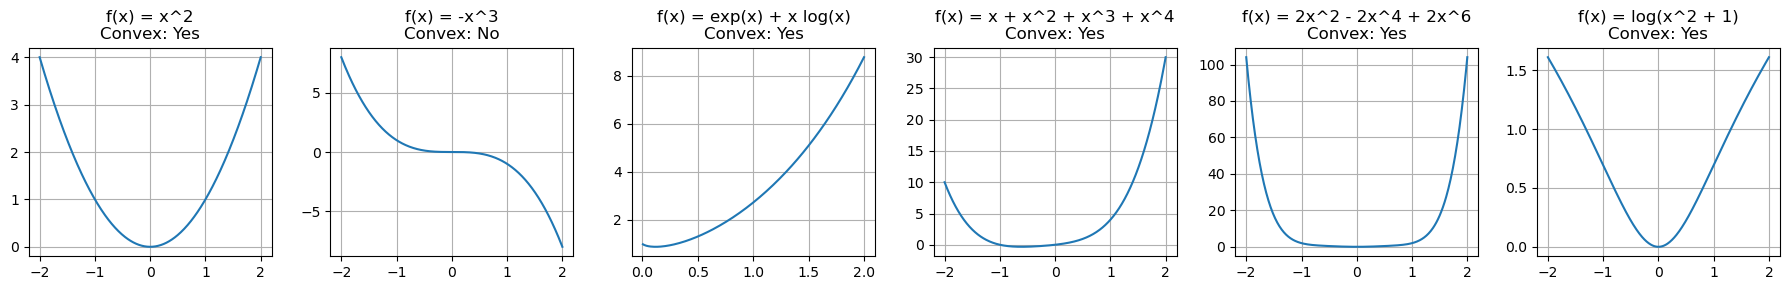

In [245]:
# Define functions and their second derivatives
def f1(x):
    return x**2

def f1_second_derivative(x):
    return np.full_like(x, 2)

def f2(x):
    return -x**3

def f2_second_derivative(x):
    return -6 * x

def f3(x):
    return np.exp(x) + x * np.log(x)

def f3_second_derivative(x):
    return np.exp(x) + 1 / x

def f4(x):
    return x + x**2 + x**3 + x**4

def f4_second_derivative(x):
    return 2 + 6*x + 12*x**2

def f5(x):
    return 2*x**2 - 2*x**4 + 2*x**6

def f5_second_derivative(x):
    return 4 - 24*x**2 + 120*x**4

def f6(x):
    return np.log(x**2 + 1)

def f6_second_derivative(x):
    return 2 / (x**2 + 1)

# Check convexity
def is_convex(second_derivative, x):
    return np.all(second_derivative(x) >= 0)

# Define x values
x = np.linspace(-2, 2, 400)
fig, axes = plt.subplots(1, 6, figsize=(18, 3))

# Plot functions
for i, (func, sec_deriv, title) in enumerate([
    (f1, f1_second_derivative, "f(x) = x^2"),
    (f2, f2_second_derivative, "f(x) = -x^3"),
    (f3, f3_second_derivative, "f(x) = exp(x) + x log(x)"),
    (f4, f4_second_derivative, "f(x) = x + x^2 + x^3 + x^4"),
    (f5, f5_second_derivative, "f(x) = 2x^2 - 2x^4 + 2x^6"),
    (f6, f6_second_derivative, "f(x) = log(x^2 + 1)")
]):
    x_valid = x[x > 0] if func == f3 else x  # Avoid log(0) issue
    axes[i].plot(x_valid, func(x_valid))
    axes[i].set_title(f"{title}\nConvex: {'Yes' if is_convex(sec_deriv, x_valid) else 'No'}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


## part 2 - Optimization in pytorch (6 points)

Use **pytorch** and **gradient descent** to find the values that minimize of the following functions. You must write your own gradient descent loop but you can use pytorch's autodiff tools to find the gradients for you.

1. $f(x) = 500x^2$
2. $f(x) = x^4 \log(x^2 + 1)$
3. $f(x, y) = y^2(x \log(x^2 + 1) + x^3)$

In [246]:
#1. Define function f(x) = 500x^2
def f1(x):
    return 500 * x**2

# Hyperparameters for gradient descent
learning_rate = 0.01
num_iterations = 100

# Initialize x with random value
x = torch.randn(1, requires_grad=True)

# Gradient descent loop 
for i in range(num_iterations):
    # Calculate function value
    loss = f1(x)
    
    # Backpropagate to calculate gradients
    loss.backward()
    
    # Update x using gradient descent
    with torch.no_grad():  # No tracking of operations for the update step
        x -= learning_rate * x.grad
    
    # Zero the gradients after updating
    x.grad.zero_()
    
    if i % 10 == 0:
        print(f"Iteration {i}, x: {x.item()}, loss: {loss.item()}")


Iteration 0, x: -1.2544950246810913, loss: 9.714553833007812
Iteration 10, x: -4374153216.0, loss: 1.1810629329737273e+20
Iteration 20, x: -1.5251727110625034e+19, loss: inf
Iteration 30, x: -5.31794709355933e+28, loss: inf
Iteration 40, x: nan, loss: inf
Iteration 50, x: nan, loss: nan
Iteration 60, x: nan, loss: nan
Iteration 70, x: nan, loss: nan
Iteration 80, x: nan, loss: nan
Iteration 90, x: nan, loss: nan


In [247]:
#2. Define the function f(x) = x^4-log(x^2+1)  
def f2(x):
    return x**4 - torch.log(x**2 + 1)

# Hyperparameters for gradient descent
learning_rate = 0.01
num_iterations = 100

# Initialize x with random value
x = torch.randn(1, requires_grad=True)

# gradient descent loop 
for i in range(num_iterations):
    # Calculate function value
    loss = f2(x)
    
    # Backpropagate to calculate gradients
    loss.backward()
    
    # Update x using gradient descent
    with torch.no_grad():  # No tracking of operations for the update step
        x -= learning_rate * x.grad
    
    # Zero the gradients after updating
    x.grad.zero_()
    
    if i % 10 == 0:
        print(f"Iteration {i}, x: {x.detach().item()}, loss: {loss.detach().item()}")


Iteration 0, x: -0.7425689101219177, loss: -0.13000202178955078
Iteration 10, x: -0.6899795532226562, loss: -0.16118139028549194
Iteration 20, x: -0.659609317779541, loss: -0.1713629812002182
Iteration 30, x: -0.640903651714325, loss: -0.1751820594072342
Iteration 40, x: -0.628939688205719, loss: -0.17673389613628387
Iteration 50, x: -0.6211065649986267, loss: -0.17739634215831757
Iteration 60, x: -0.6159003973007202, loss: -0.17768824100494385
Iteration 70, x: -0.6124059557914734, loss: -0.17781950533390045
Iteration 80, x: -0.6100449562072754, loss: -0.17787933349609375
Iteration 90, x: -0.6084428429603577, loss: -0.17790688574314117


In [248]:
#3. Define the function  f(x, y) = y^2(x \log(x^2 + 1) + x^3)
def f3(x, y):
    return y**2 * (x * torch.log(x**2 + 1) + x**3)

# Hyperparameters for gradient descent
learning_rate = 0.01
num_iterations = 100

# Initialize x and y with random value
x = torch.randn(1, requires_grad=True)
y = torch.randn(1, requires_grad=True)


# Gradient descent loop
for i in range(num_iterations):
    # Calculate function value
    loss = f3(x, y)
    
    # Backpropagate to calculate gradients
    loss.backward()
    
    # Update x and y using gradient descent
    with torch.no_grad():  # No tracking of operations for the update step
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad
    
    # Zero the gradients after updating
    x.grad.zero_()
    y.grad.zero_()
    
    if i % 10 == 0:
        print(f"Iteration {i}, x: {x.detach().item()}, y: {y.detach().item()}, loss: {loss.detach().item()}")
        


Iteration 0, x: -1.2352964878082275, y: -0.13485853374004364, loss: -0.0488797165453434
Iteration 10, x: -1.2576690912246704, y: -0.2453143447637558, loss: -0.16808171570301056
Iteration 20, x: -1.3405760526657104, y: -0.4719885587692261, loss: -0.7106719613075256
Iteration 30, x: -1.8739306926727295, y: -1.2364970445632935, loss: -8.799572944641113
Iteration 40, x: nan, y: nan, loss: nan
Iteration 50, x: nan, y: nan, loss: nan
Iteration 60, x: nan, y: nan, loss: nan
Iteration 70, x: nan, y: nan, loss: nan
Iteration 80, x: nan, y: nan, loss: nan
Iteration 90, x: nan, y: nan, loss: nan


## part 3 - Global optimization (6 points)

Suppose we have the following function:
$$
f(x) = x^2 + \sin(\pi x) + 0.5 \sin(2\pi x) + 0.5 \sin(3\pi x) + 0.5 \sin(4\pi x)
$$
and we want to find the value of $x$ that __globally minimizes__ $f(x)$.

1. Over what range of starting values $x_0$ will gradient descent be guaranteed to find the __global__ minimum? I.e. find the interval of $x$ values whos local minima is the global minima. You don't need to solve for this exactly, just estimate the range to the first decimal place.

2. What happens if we initialize outside this range and run gradient descent?

3. Use pytorch and gradient descent to find the global minimizer using a valid starting point.

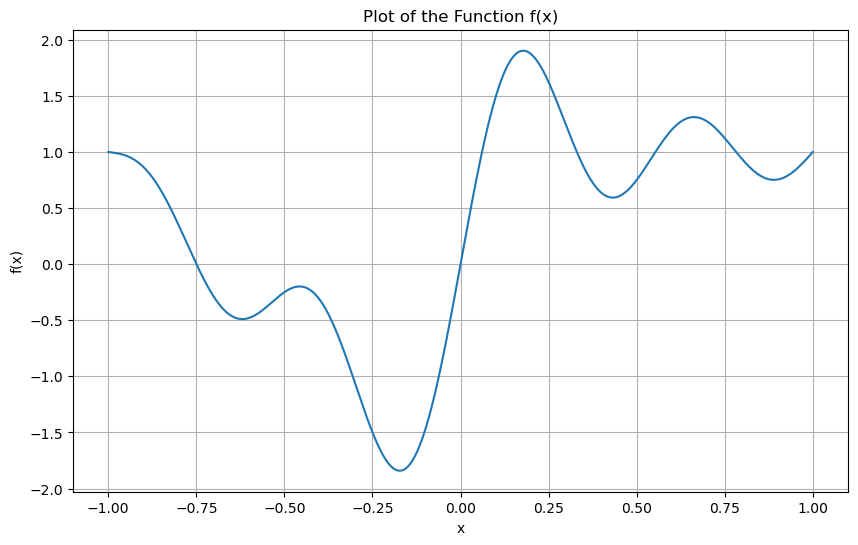

From the plot, we can see that the global minimum of the function f(x) is in the range of -0.25 to 0.


In [249]:
#1. 

#Define the function f(x) = x^2 + sin(pi*x) + 0.5sin(2*pi*x)+0.5sin(3*pi*x)+0.5sin(4*pi*x)
def f(x):
    return x**2 + torch.sin(math.pi * x) + 0.5 * torch.sin(2 * math.pi * x) + 0.5 * torch.sin(3 * math.pi * x) + 0.5 * torch.sin(4 * math.pi * x)

#Range of x values to find the global minimum
x_values = torch.linspace(-1, 1, 1000)

#Show the plot of the function f(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, f(x_values))
plt.title("Plot of the Function f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

print("From the plot, we can see that the global minimum of the function f(x) is in the range of -0.25 to 0.")

In [250]:
#3. 
# Gradient Descent loop
def gradient_descent(learning_rate=0.01, num_iterations=100):
    x = torch.tensor([-1.0], requires_grad=True)  # Initialize x outside the range of the global minimum
    for i in range(num_iterations):
        # Calculate function value
        loss = f(x)
        
        # Backpropagate to calculate gradients
        loss.backward()
        
        # Update x using gradient descent
        with torch.no_grad():  # No tracking of operations for the update step
            x -= learning_rate * x.grad
        
        # Zero the gradients after updating
        x.grad.zero_()
        
        if i % 10 == 0:
            print(f"Iteration {i}, x: {x.item()}, loss: {loss.item()}")
    
    return x

# Apply gradient descent outside the range of the global minimum 
optimized_x = gradient_descent(learning_rate=0.01, num_iterations=100)

print(f"Optimized x for f(x): {optimized_x.item()}")
print("Since we started outside the range found in the plot above, the optimized x value is not the global minimum of the function f(x).")

Iteration 0, x: -0.9957079887390137, loss: 0.9999998211860657
Iteration 10, x: -0.9223151206970215, loss: 0.9510461091995239
Iteration 20, x: -0.620368242263794, loss: -0.48911452293395996
Iteration 30, x: -0.6195094585418701, loss: -0.48923349380493164
Iteration 40, x: -0.6195093393325806, loss: -0.4892335534095764
Iteration 50, x: -0.6195093393325806, loss: -0.4892335534095764
Iteration 60, x: -0.6195093393325806, loss: -0.4892335534095764
Iteration 70, x: -0.6195093393325806, loss: -0.4892335534095764
Iteration 80, x: -0.6195093393325806, loss: -0.4892335534095764
Iteration 90, x: -0.6195093393325806, loss: -0.4892335534095764
Optimized x for f(x): -0.6195093393325806
Since we started outside the range found in the plot above, the optimized x value is not the global minimum of the function f(x).


In [251]:
#3. Gradient Descent with a starting point near the global minimum
# Gradient Descent loop
def gradient_descent(learning_rate=0.01, num_iterations=100):
    x = torch.tensor([-0.25], requires_grad=True)  # Initialize x near the global minimum
    for i in range(num_iterations):
        # Calculate function value
        loss = f(x)
        
        # Backpropagate to calculate gradients
        loss.backward()
        
        # Update x using gradient descent
        with torch.no_grad():  # No tracking of operations for the update step
            x -= learning_rate * x.grad
        
        # Zero the gradients after updating
        x.grad.zero_()
        
        if i % 10 == 0:
            print(f"Iteration {i}, x: {x.item()}, loss: {loss.item()}")
    
    return x

# Apply gradient descent near the global minimum
optimized_x = gradient_descent(learning_rate=0.01, num_iterations=100)

print(f"Optimized x for f(x): {optimized_x.item()}")
print("Since we started near the global minimum found in the plot above, the optimized x value is close to the global minimum of the function f(x).")

Iteration 0, x: -0.1710609346628189, loss: -1.4981602430343628
Iteration 10, x: -0.1726929098367691, loss: -1.8406997919082642
Iteration 20, x: -0.1726929396390915, loss: -1.8406997919082642
Iteration 30, x: -0.1726929396390915, loss: -1.8406997919082642
Iteration 40, x: -0.1726929396390915, loss: -1.8406997919082642
Iteration 50, x: -0.1726929396390915, loss: -1.8406997919082642
Iteration 60, x: -0.1726929396390915, loss: -1.8406997919082642
Iteration 70, x: -0.1726929396390915, loss: -1.8406997919082642
Iteration 80, x: -0.1726929396390915, loss: -1.8406997919082642
Iteration 90, x: -0.1726929396390915, loss: -1.8406997919082642
Optimized x for f(x): -0.17269295454025269
Since we started near the global minimum found in the plot above, the optimized x value is close to the global minimum of the function f(x).


## part 4 - modifying gradient descent (6 points)

Suppose again that we have the following function:
$$
f(x) = x^2 + \sin(\pi x) + 0.5 \sin(2\pi x) + 0.5 \sin(3\pi x) + 0.5 \sin(4\pi x)
$$
and we want to find the value of $x$ that __globally minimizes__ $f(x)$.

This time, lets assume that we do not know what the valid starting points are. Think of a way to modify your gradient descent procedure to find the global minima of this function for any starting point in $[-2, 2]$. Implement your idea and test it on the starting points $\{-2, -1, 0, 1, 2\}$.
  - Couple of ideas to consider:
    1. High learning rates can help explore parameter space quickly. Low learning rates help convergence.
    2. Small amounts of noise added to the gradient updates can help jump out of local minima
    3. Repeated reinitialization might land you in the optimal starting zone by chance
    4. This function is close to a simple convex function, maybe the convex function's minima is close to this functions minima?

  - Describe the pros and cons of your solution in terms of how often you observe it converging to the correct value and how long it takes to run.
  - Do not cheat and manually reinitialize in the valid region you found in part 3.

In [252]:
# define the function f(x) = x^2 + sin(pi*x) + 0.5sin(2*pi*x)+0.5sin(3*pi*x)+0.5sin(4*pi*x)
def f(x):
    return x**2 + torch.sin(math.pi * x) + 0.5 * torch.sin(2 * math.pi * x) + 0.5 * torch.sin(3 * math.pi * x) + 0.5 * torch.sin(4 * math.pi * x)

# Modified gradient descent loop with starting points and restarts to find the global minimum
# Gradient Descent loop
def gradient_descent_with_restarts(starting_points, learning_rate = 0.1, num_iterations=1000, noise_scale = 0.05, tolerance=1e-6):
    best_x = None # Variable to store the best x value
    best_f = float('inf') # Initialize the best function value to infinity

    for x0 in starting_points:
        
        x = torch.tensor([x0], dtype=torch.float32, requires_grad=True) #Convert the starting point to a tensor
        
        for i in range(num_iterations):
            # Calculate function value
            loss = f(x) 

            # Backpropagate to calculate gradients
            loss.backward() 
            
            # Generate small noise to add to the gradient to escape local minima
            noise = torch.randn_like(x) * noise_scale

            # Update x using gradient descent
            with torch.no_grad():  # No tracking of operations for the update step
                x_new = x - learning_rate * (x.grad.item() + noise) 

                if abs(x_new.item() - x.item()) < tolerance: # Check if the change in x is below the tolerance  
                    break # Break the loop if the change in x is below the tolerance

                # Update x with the new value
                x.copy_(torch.tensor([x_new.item()], dtype=torch.float32, requires_grad=True))

                # Zero the gradients after updating
                x.grad.zero_()

                # Decay the learning rate for better convergence
                learning_rate *= 0.99

        if loss.item() < best_f: # Check if the current loss is better than the best loss 
            best_x = x # Update the best x value
            best_f = loss.item() # Update the best loss value
                
    return best_x.item(), best_f 

# Define the starting points [-2, 1, 0, -1, 2] for the gradient descent
starting_points = [-2, 1, 0, -1, 2]

# Run the modified gradient descent with the starting points
global_min_x, global_min_f = gradient_descent_with_restarts(starting_points)

# Print the global minimum of the function f(x)
print("Global minimum of f(x):", global_min_f)
print("x value where the global minimum occurs:", global_min_x)


Global minimum of f(x): -1.8406977653503418
x value where the global minimum occurs: -0.17286968231201172


  - Describe the pros and cons of your solution in terms of how often you observe it converging to the correct value and how long it takes to run.

  The pros for the restart variation of the gradient descent function is that the multiple restarts, increases the chance that the final best_x local minimum is the global minimum. Furthermore, the function adds a noise parameter to ensure we can get out of a local minimum.

## part 5 - fitting models (8 points)

Use pytorch to fit the following models to the provided data (do not change the data)

- $f(x) = \alpha + \beta_1 x$
- $g(x) = \alpha + \beta_1 x + \beta_2 x^2$
- $h(x) = \alpha + \beta_1 x  + \beta_2 x^2 + \beta_3 \sin(\beta_4 x)$

1. Each of these models represents a function from a certain model class. Which class is the largest and which is the smallest?
2. Which model should achieve the lowest training MSE? Which model should have highest training MSE?
3. Fit each model to the data using the MSE loss and compare their training MSEs. Which model actually achieved the lowest training MSE?
4. Evaluate each model on the test data. Which model had the lowest test MSE?


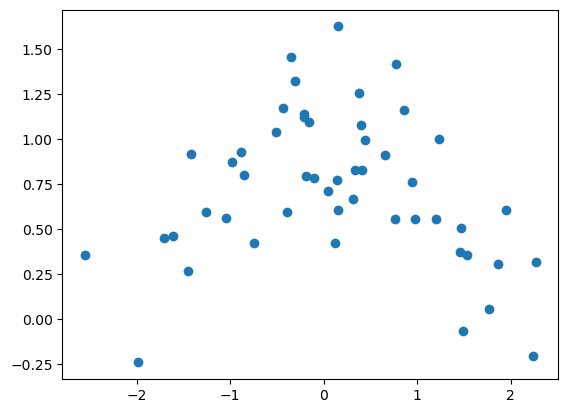

In [253]:
np.random.seed(0)
x = np.random.normal(0, 1, [50, 1])
y = np.exp(-x**2/3) + np.random.normal(0, 1/3, [50, 1])

plt.scatter(x, y)

1. Each of these models represents a function from a certain model class. Which class is the largest and which is the smallest?

The model f(x) is a linear model, the second model g(x) is a quadratic model, the third model h(x) has a sine term and a quadratic term thus it is a non-linear model. Since h(x) is a non-linear model with both a quadratic term and sine term it is the most flexible function and will be able to fit the data in the plot above the best. This makes it the largest class. The smallest class is f(x) due it being a linear model that may not best capture the non-linear nature of the plot above. 

2. Which model should achieve the lowest training MSE? Which model should have highest training MSE?

Since h(x) is the largest class, the MSE training will be the lowest as it can best fit the data in the plot above. The highest MSE training will be the f(x) model, due to it being a linear model. Since it will not be able to represent an non-linear features of the actual model the error will be the highest of the three functions. 

In [254]:
#3. Fit the models
# Define f(x) the linear model
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.alpha = torch.nn.Parameter(torch.randn(1))
        self.beta1 = torch.nn.Parameter(torch.randn(1))
    
    def forward(self, x):
        return self.alpha + self.beta1 * x

# Define g(x) the quadratic model
class QuadraticModel(torch.nn.Module):
    def __init__(self):
        super(QuadraticModel, self).__init__()
        self.alpha = torch.nn.Parameter(torch.randn(1))
        self.beta1 = torch.nn.Parameter(torch.randn(1))
        self.beta2 = torch.nn.Parameter(torch.randn(1))
    
    def forward(self, x):
        x = x.view(-1, 1)  # Ensure x is at least 2D
        return self.alpha + self.beta1 * x + self.beta2 * x**2

# Define h(x) the non-linear model
class NonLinearModel(torch.nn.Module):
    def __init__(self):
        super(NonLinearModel, self).__init__()
        self.alpha = torch.nn.Parameter(torch.randn(1))
        self.beta1 = torch.nn.Parameter(torch.randn(1))
        self.beta2 = torch.nn.Parameter(torch.randn(1))
        self.beta3 = torch.nn.Parameter(torch.randn(1))
        self.beta4 = torch.nn.Parameter(torch.randn(1))

    
    def forward(self, x):
        return self.alpha + self.beta1 * x + self.beta2 * x**2 + self.beta3 * torch.sin(self.beta4 * x)


In [255]:
#Convert the data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [256]:
# Function to train a model using MSE loss
def train_model(model, X_train, Y_train, lr=0.1, epochs=1000):
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    loss_fn = torch.nn.MSELoss()
    
    for _ in range(epochs):
        optimizer.zero_grad()  # Reset gradients
        loss = loss_fn(model(X_train), Y_train)  # Compute loss
        loss.backward()  # Backpropagate
        optimizer.step()  # Update parameters
    
    return loss.item()  # Return final training loss

In [257]:
# Call the Linear Model defined above
linear_model = LinearModel()

# Train the Linear Model
train_loss_linear = train_model(linear_model, torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))

# Evaluate the Linear Model
with torch.no_grad():
    test_loss_linear = torch.nn.MSELoss()(linear_model(torch.tensor(x_test, dtype=torch.float32)), torch.tensor(y_test, dtype=torch.float32)).item()

print(f"Linear Model - Training MSE: {train_loss_linear:.4f}, Test MSE: {test_loss_linear:.4f}")

Linear Model - Training MSE: 0.1802, Test MSE: 0.0923


In [258]:
# Call the Quadratic Model defined above
quadratic_model = QuadraticModel()

# Train the Quadratic Model
train_loss_quadratic = train_model(quadratic_model, torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))

# Evaluate the Quadratic Model
with torch.no_grad():
    test_loss_quadratic = torch.nn.MSELoss()(quadratic_model(torch.tensor(x_test, dtype=torch.float32)), torch.tensor(y_test, dtype=torch.float32)).item()

print(f"Quadratic Model - Training MSE: {train_loss_quadratic:.4f}, Test MSE: {test_loss_quadratic:.4f}")

Quadratic Model - Training MSE: 0.0966, Test MSE: 0.0599


In [259]:
#Call the Nonlinear Model defined above
nonlinear_model = NonLinearModel()

# Train the Nonlinear Model
train_loss_nonlinear = train_model(nonlinear_model, torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))

# Evaluate the Nonlinear Model
with torch.no_grad():
    test_loss_nonlinear = torch.nn.MSELoss()(nonlinear_model(torch.tensor(x_test, dtype=torch.float32)), torch.tensor(y_test, dtype=torch.float32)).item()

print(f"Nonlinear Model - Training MSE: {train_loss_nonlinear:.4f}, Test MSE: {test_loss_nonlinear:.4f}")

Nonlinear Model - Training MSE: 0.0967, Test MSE: 0.0599


3. Fit each model to the data using the MSE loss and compare their training MSEs. Which model actually achieved the lowest training MSE?

The lowest training MSE loss from the three models was the Non-linear model, with 0.0956. The highest training MSE los is the Linear model with 0.1802. 

4. Evaluate each model on the test data. Which model had the lowest test MSE?

The lowest test MSE loss was actually the quadratic model with 0.0599, instead of the Non-linear model with 0.0604.

# Q4 - Application (10 points)

You are in charge of monitoring air quality in Italy. Your job is to predict the concentration of CO, C6H6, NOx, and NO2 based on sensor readings of temperature, humidity, and various other gas concentrations. Use the following dataset to build a single linear regression model that uses the 9 features to predict the 4 targets. Verify that your model has converged on train and that it generalizes to validation (each loss < 0.03). When you have settled on an optimal model, check and report the loss on train, test, and validation and compare these numbers.

_hint: consider a low learning rate and long training time_

In [260]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [261]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
x = air_quality.data.features
x = x.dropna()

# separate into actual features and targets
y = torch.tensor(np.array(x.loc[:,['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]))
x = torch.tensor(np.array(x.drop(['Date', 'Time', 'CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)'], axis = 1)))

# rescale
x = torch.exp(x/1000)
y = torch.exp(y/1000)

# train, test, val
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

In [262]:
# Standardize the features
xtrain_mean = xtrain.mean(dim=0)
xtrain_std = xtrain.std(dim=0)
xtrain = (xtrain - xtrain_mean) / xtrain_std
xval = (xval - xtrain_mean) / xtrain_std
xtest = (xtest - xtrain_mean) / xtrain_std


In [263]:
# Define the model
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim, bias=True)
        
    def forward(self, x):
        return self.linear(x)

In [264]:
# Initialize the model
input_dim = xtrain.shape[1] # 9 features
output_dim = ytrain.shape[1] # 4 targets

model = LinearRegressionModel(input_dim, output_dim)

In [265]:
# Define the loss function (MSE)
criterion = torch.nn.MSELoss()

# Define the optimizer (Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [266]:
# Ensure all tensors are of the same dtype
xtrain = xtrain.float()
ytrain = ytrain.float()
xval = xval.float()
yval = yval.float()

num_epochs = 1000

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    
    # Forward pass
    ytrain_pred = model(xtrain)
    
    # Compute the loss
    loss = criterion(ytrain_pred, ytrain)
    
    # Zero gradients, backward pass, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Set the model to evaluation mode
    model.eval()
    
    # Compute the validation loss
    with torch.no_grad():
        yval_pred = model(xval)
        val_loss = criterion(yval_pred, yval)
    
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")
    
    # Check if the validation loss is below a threshold of 0.03
    if val_loss.item() < 0.03:
        print(f"Validation Loss below 0.03 at Epoch {epoch}")
        break

Epoch 0, Training Loss: 1.52732515335083, Validation Loss: 1.5090632438659668
Epoch 100, Training Loss: 0.48611000180244446, Validation Loss: 0.48726722598075867
Epoch 200, Training Loss: 0.2011706382036209, Validation Loss: 0.20185565948486328
Epoch 300, Training Loss: 0.09695285558700562, Validation Loss: 0.09798674285411835
Epoch 400, Training Loss: 0.0559295155107975, Validation Loss: 0.057314906269311905
Epoch 500, Training Loss: 0.038707196712493896, Validation Loss: 0.04031910374760628
Epoch 600, Training Loss: 0.030871698632836342, Validation Loss: 0.03261026367545128
Validation Loss below 0.03 at Epoch 661
